In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
from sklearn.cluster import DBSCAN

In [6]:
# Display Prefrences:
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

heartdisease_df = pd.read_sql_query('select * from heartdisease', con=engine)

# No need for an open connection, because you're only doing a single query:
engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

# heartdisease_df_2 = heartdisease_df.copy()

In [7]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
# Defining the agglomerative clustering with eps = 1 and minPts = 1:
dbscan_cluster = DBSCAN(eps=1, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

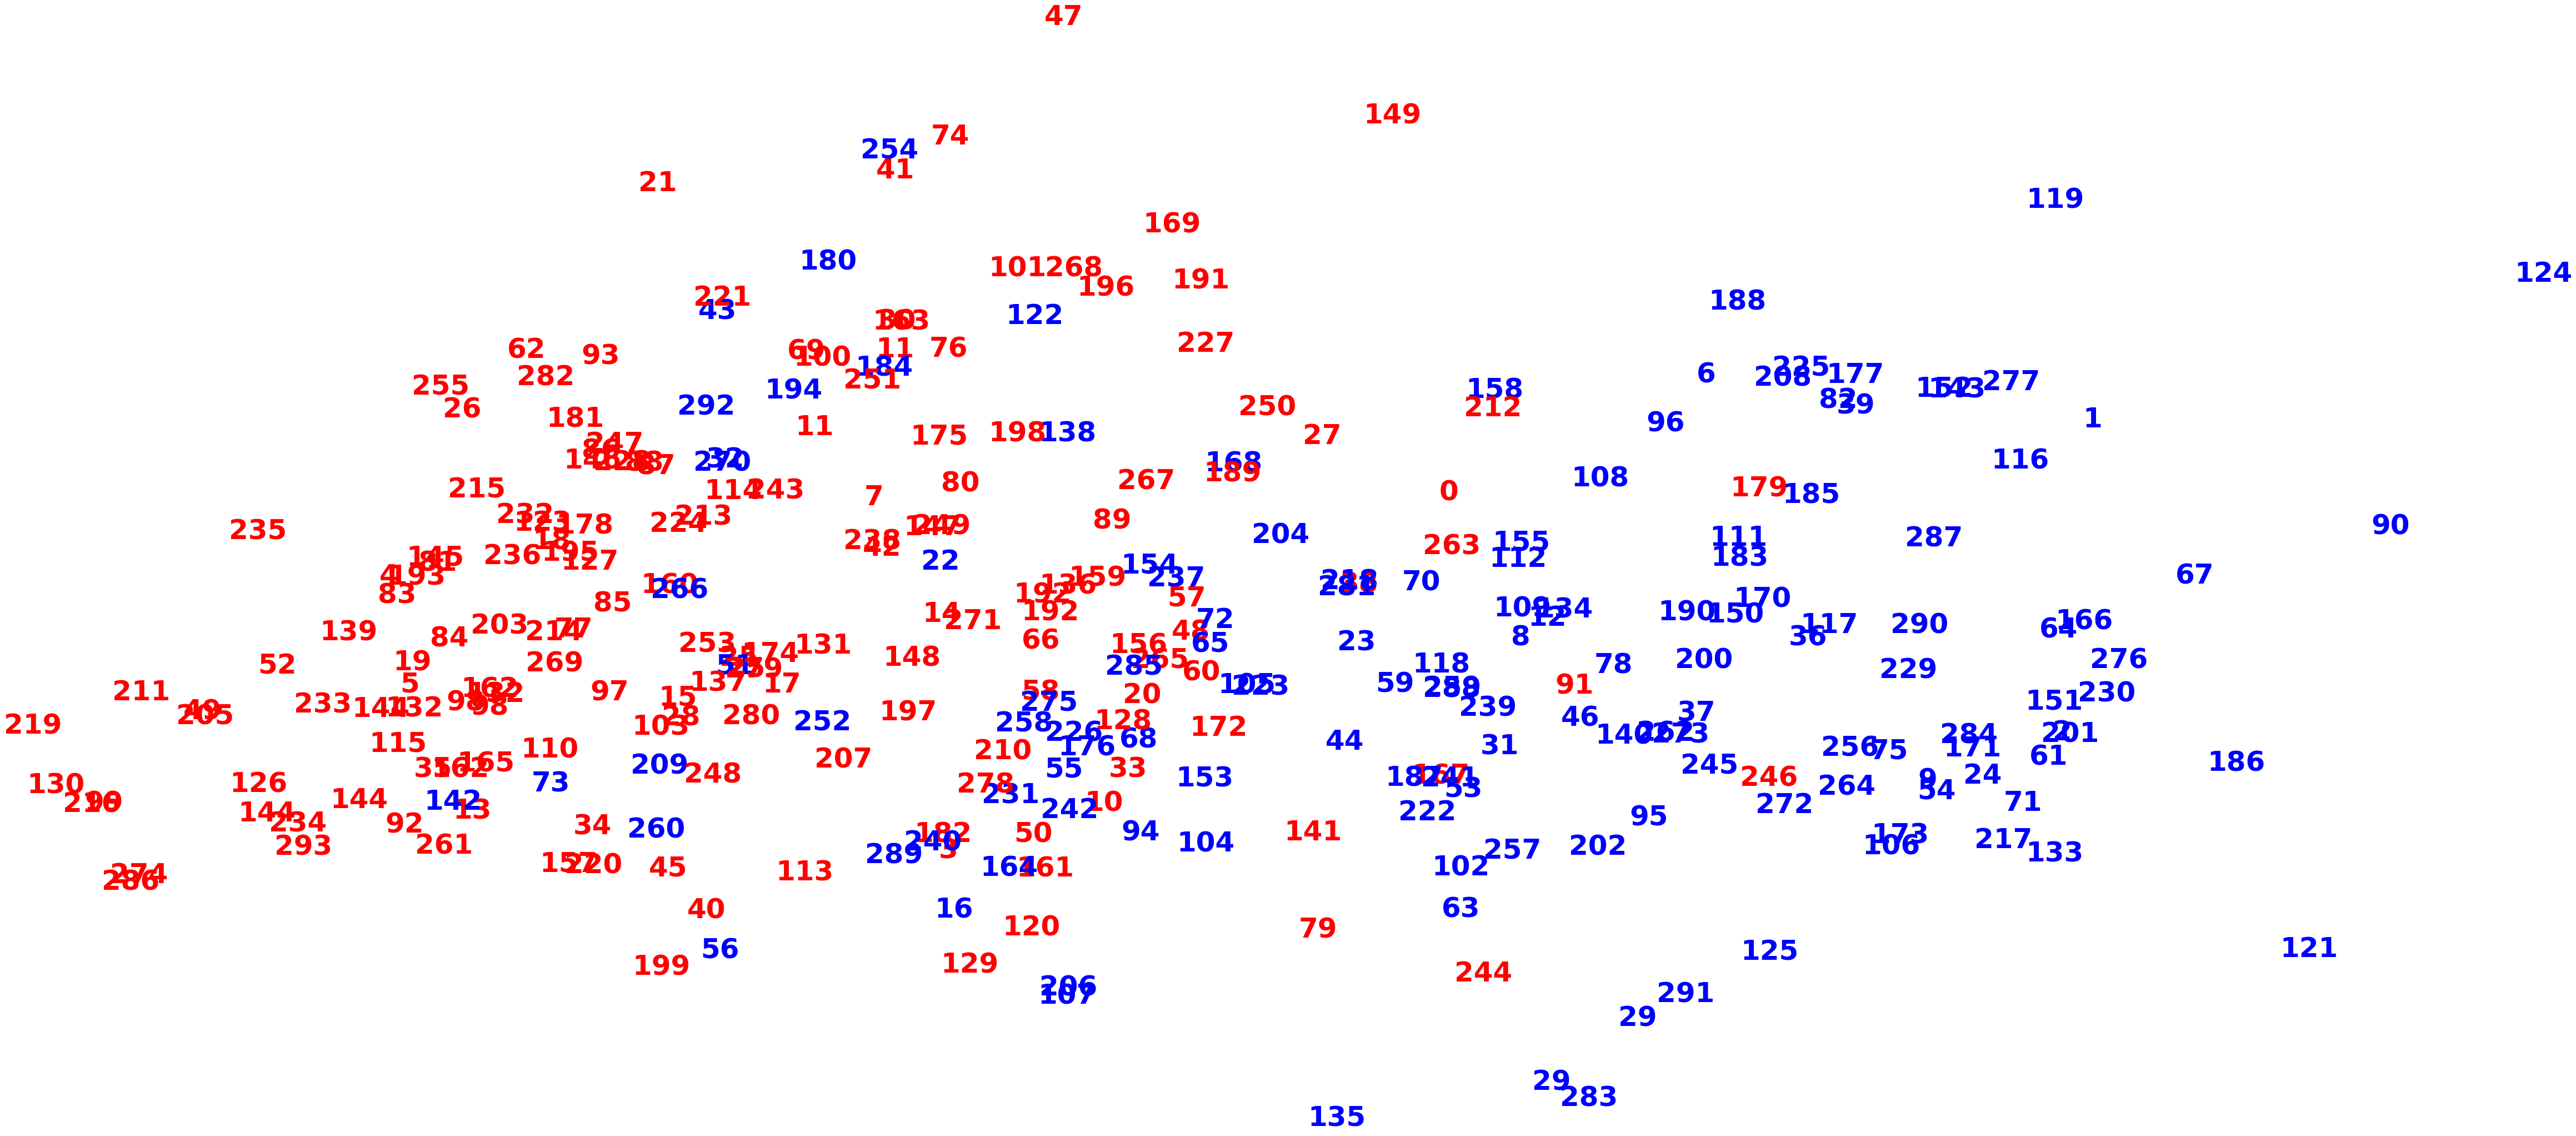

In [9]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [13]:
print("Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=1 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=1 and minPts=1 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=1 is: 0.0004340648309851829
The silhouette score of the DBSCAN solution with eps=1 and minPts=1 is: 0.0280626364014319


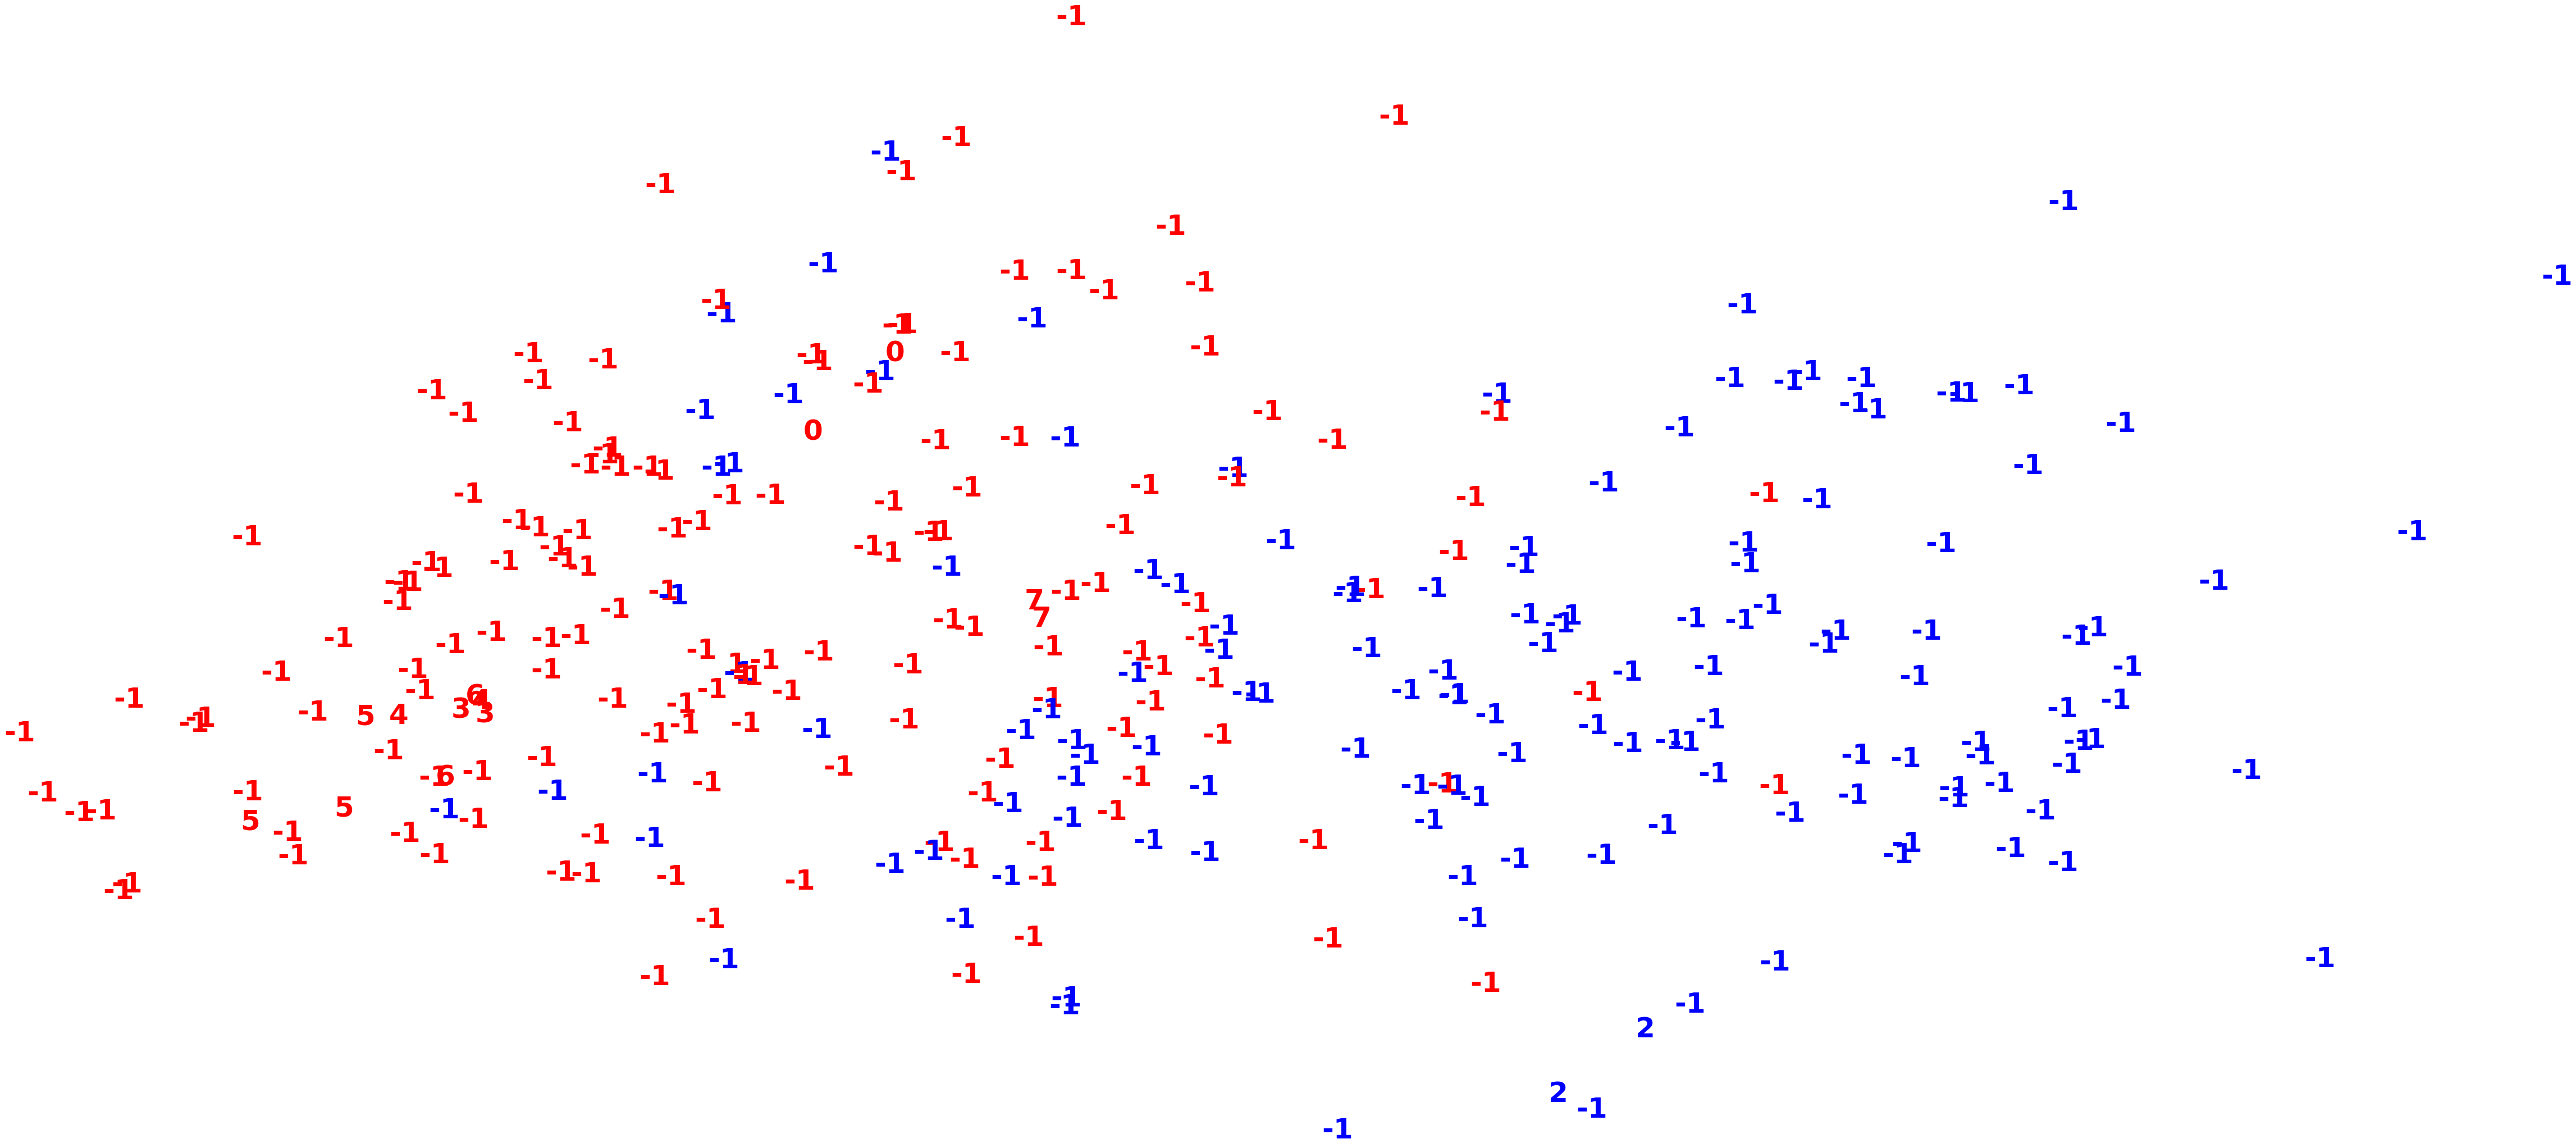

Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=2 is: -0.008961679875102968
The silhouette score of the DBSCAN solution with eps=1 and minPts=2 is: -0.2558056626717109


In [14]:
# Defining the agglomerative clustering with eps = 1 and minPts = 2:
dbscan_cluster = DBSCAN(eps=1, min_samples=2)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=2 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=1 and minPts=2 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

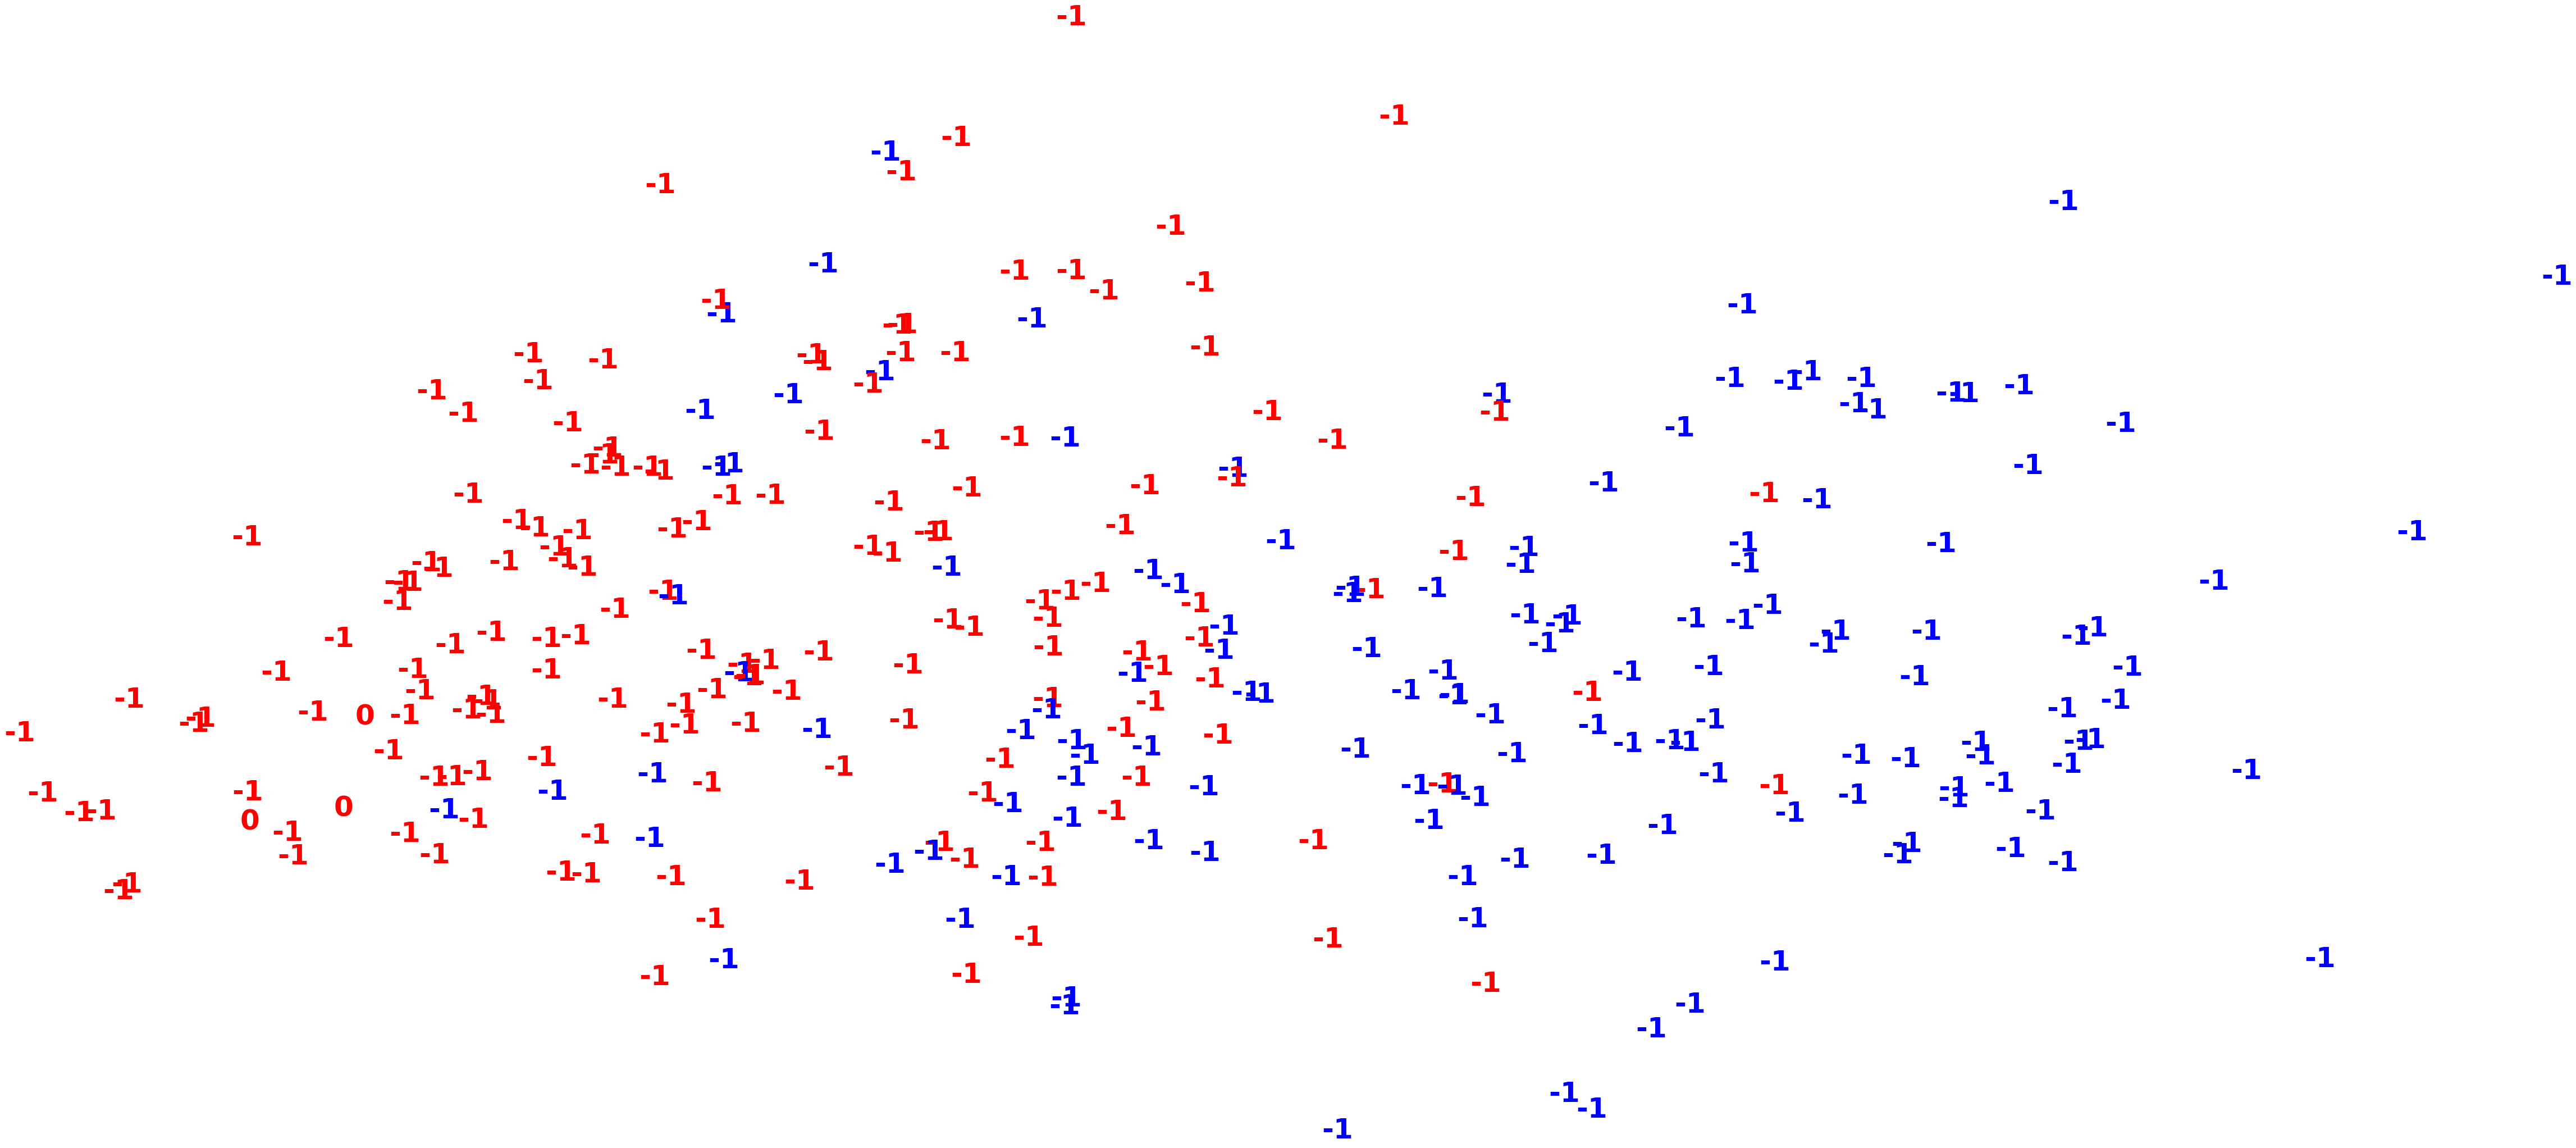

Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=3 is: -0.002755933782262106
The silhouette score of the DBSCAN solution with eps=1 and minPts=3 is: -0.11413521440464985


In [15]:
# Defining the agglomerative clustering with eps = 1 and minPts = 3:
dbscan_cluster = DBSCAN(eps=1, min_samples=3)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=3 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=1 and minPts=3 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

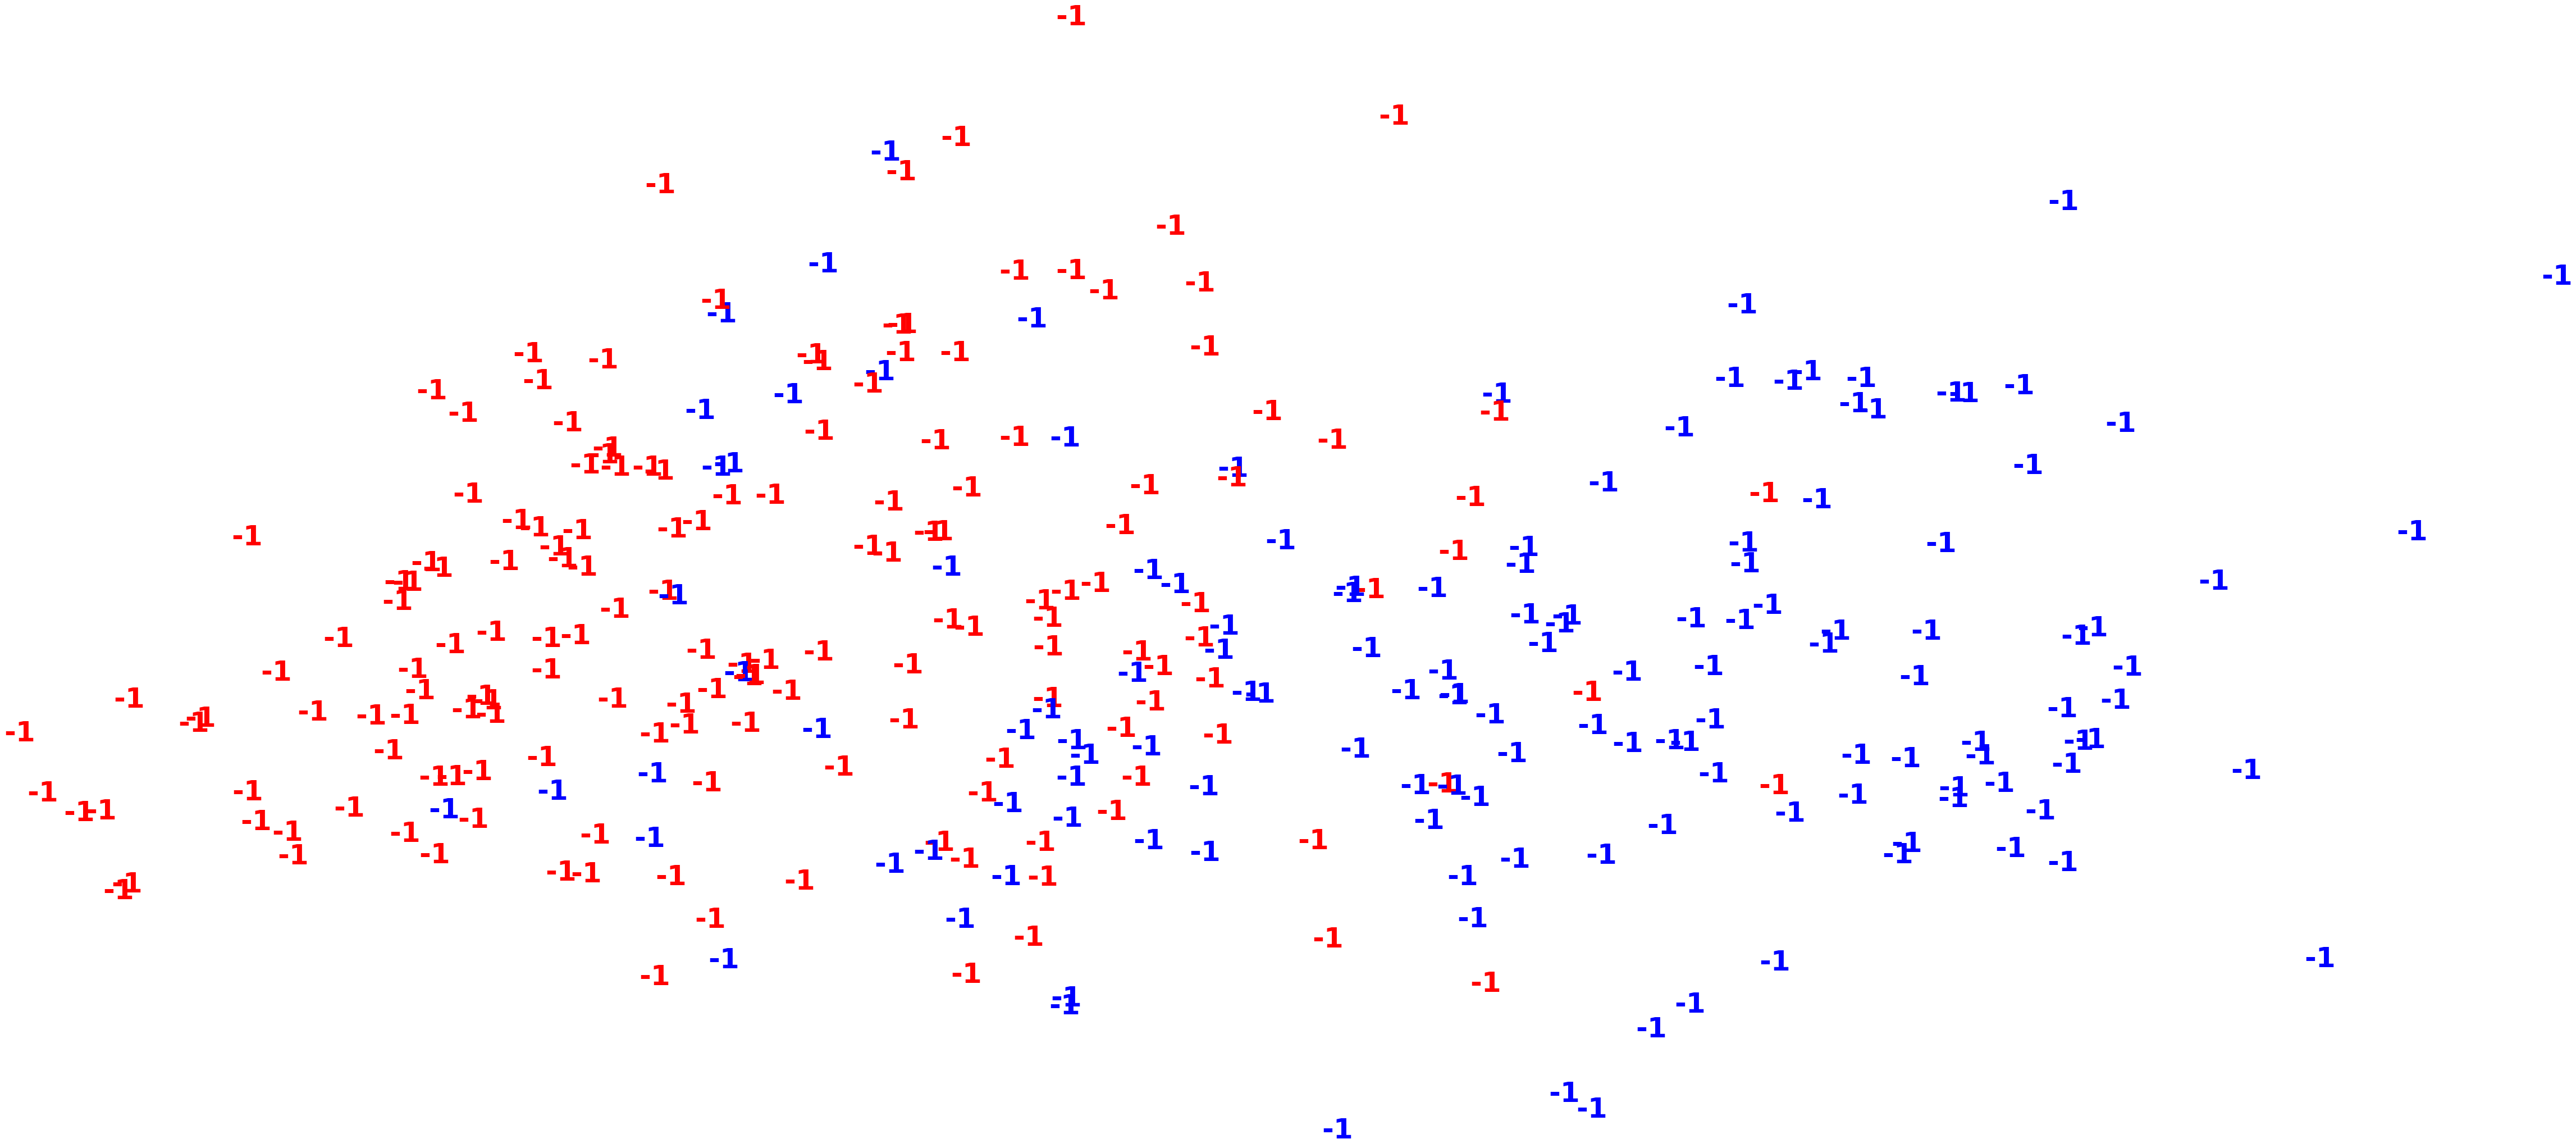

Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=4 is: 0.0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [19]:
# Defining the agglomerative clustering with eps = 1 and minPts = 4:
dbscan_cluster = DBSCAN(eps=1, min_samples=4)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=1 and minPts=4 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=1 and minPts=4 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

When we increased the minPts value from 1 to 2 to 3 to 4,
both Adjusted Rand Index and the Silhouette Score went down into the negative. 
But in all four cases the DBSCAN always only finds two clusters. And we couldn't sample minPts=4 becuase the sample size was 1. 

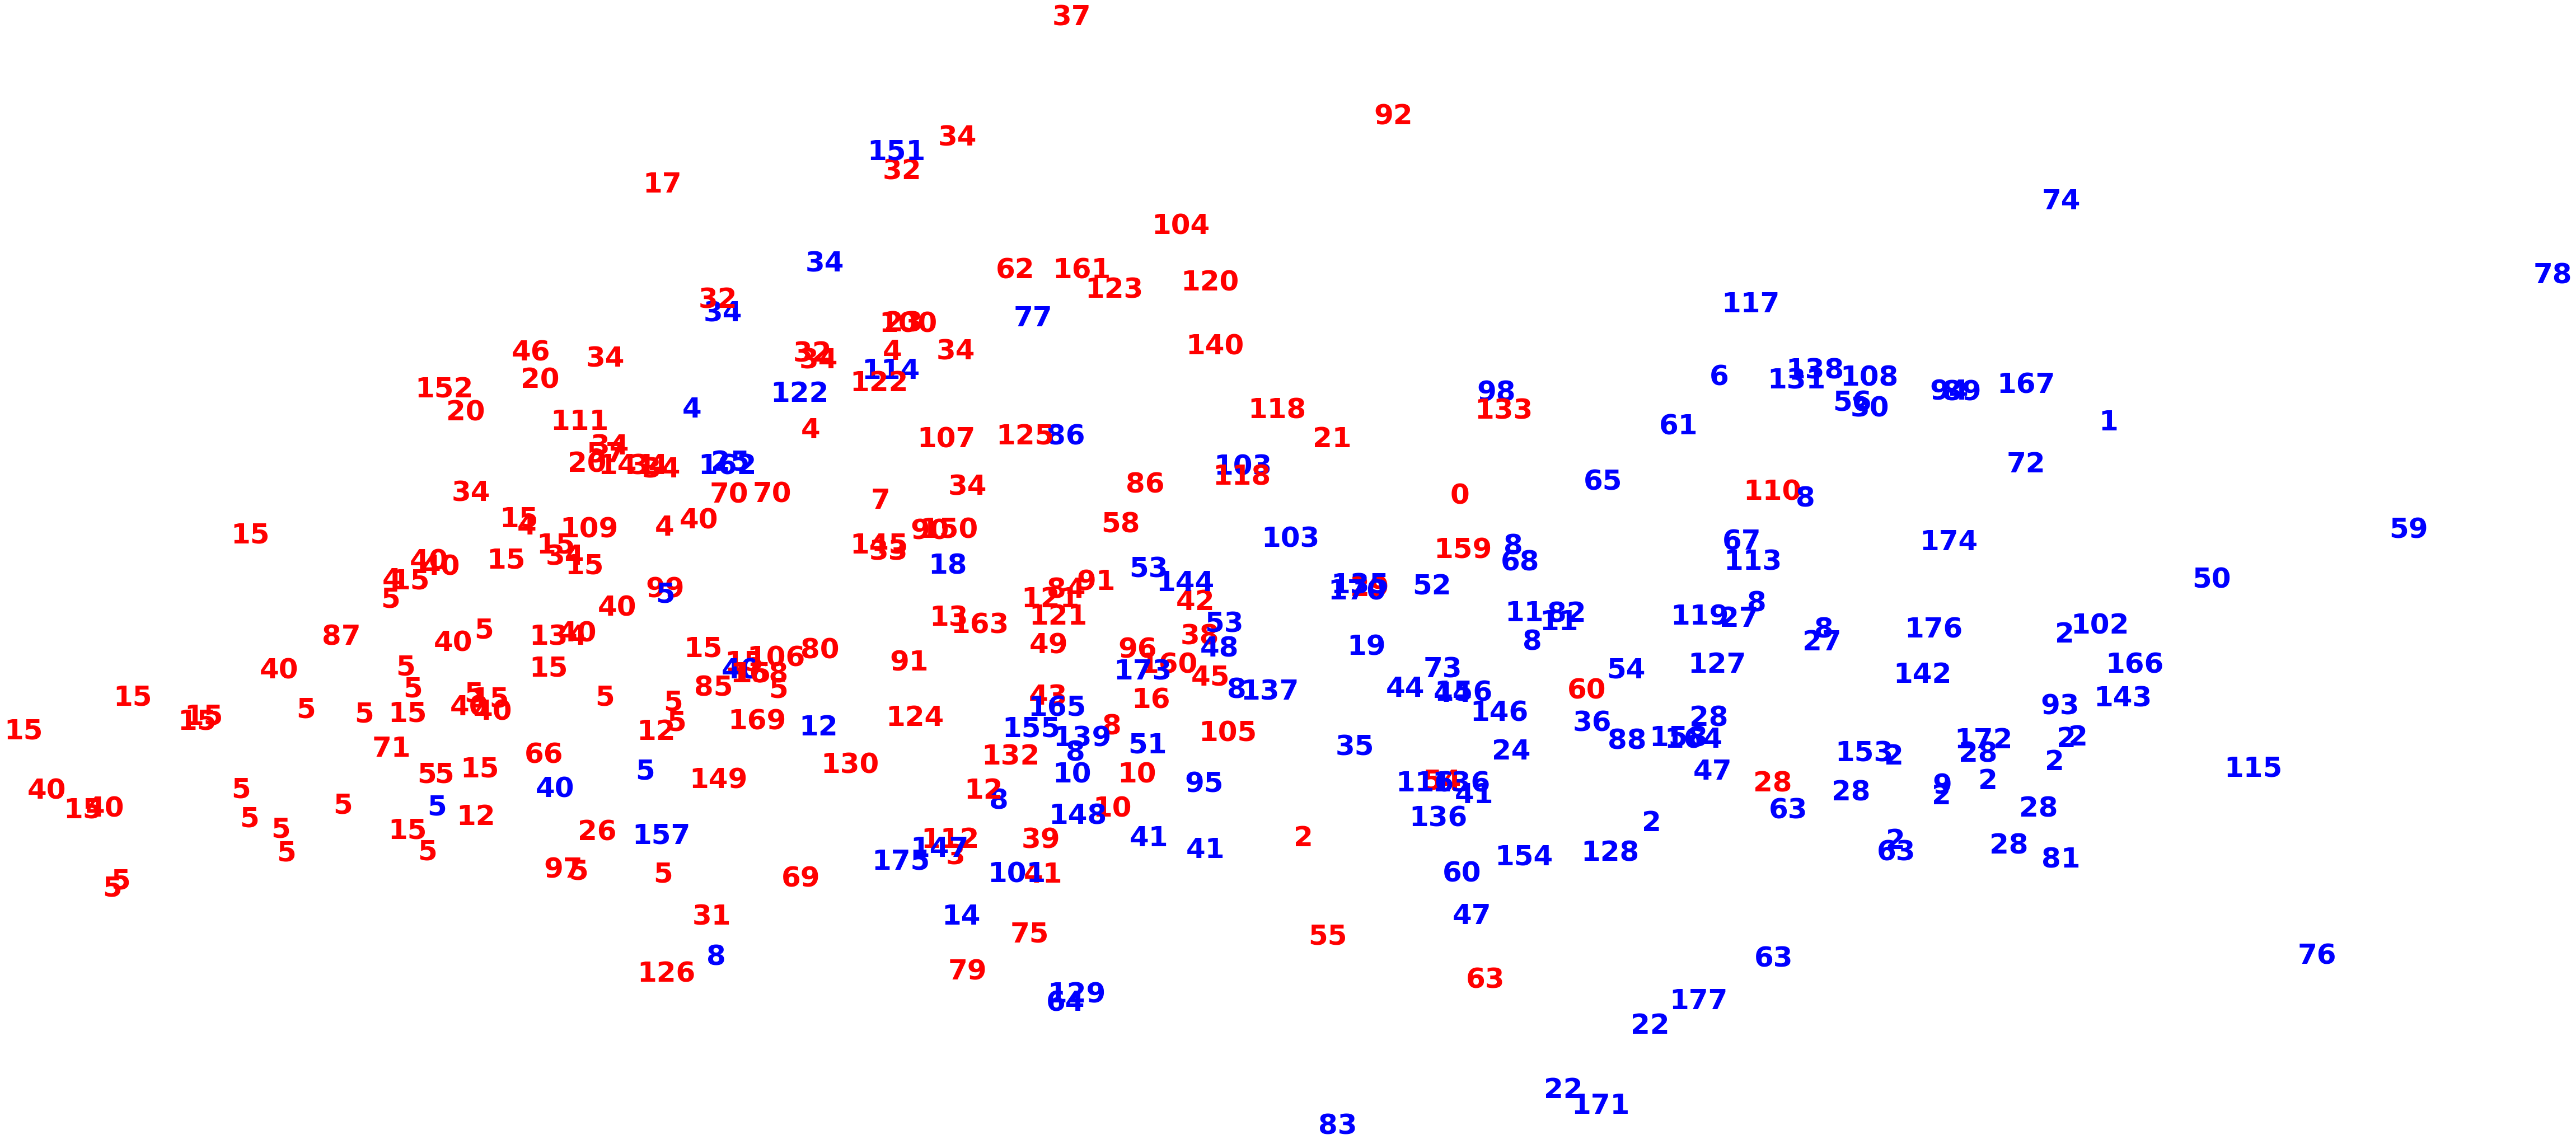

Adjusted Rand Index of the DBSCAN solution with eps=2 and minPts=1 is: 0.021441604491943305
The silhouette score of the DBSCAN solution with eps=2 and minPts=1 is: 0.06330651921428514


In [16]:
# Defining the agglomerative clustering with eps = 2 and minPts = 1:
dbscan_cluster = DBSCAN(eps=2, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=2 and minPts=1 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=2 and minPts=1 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

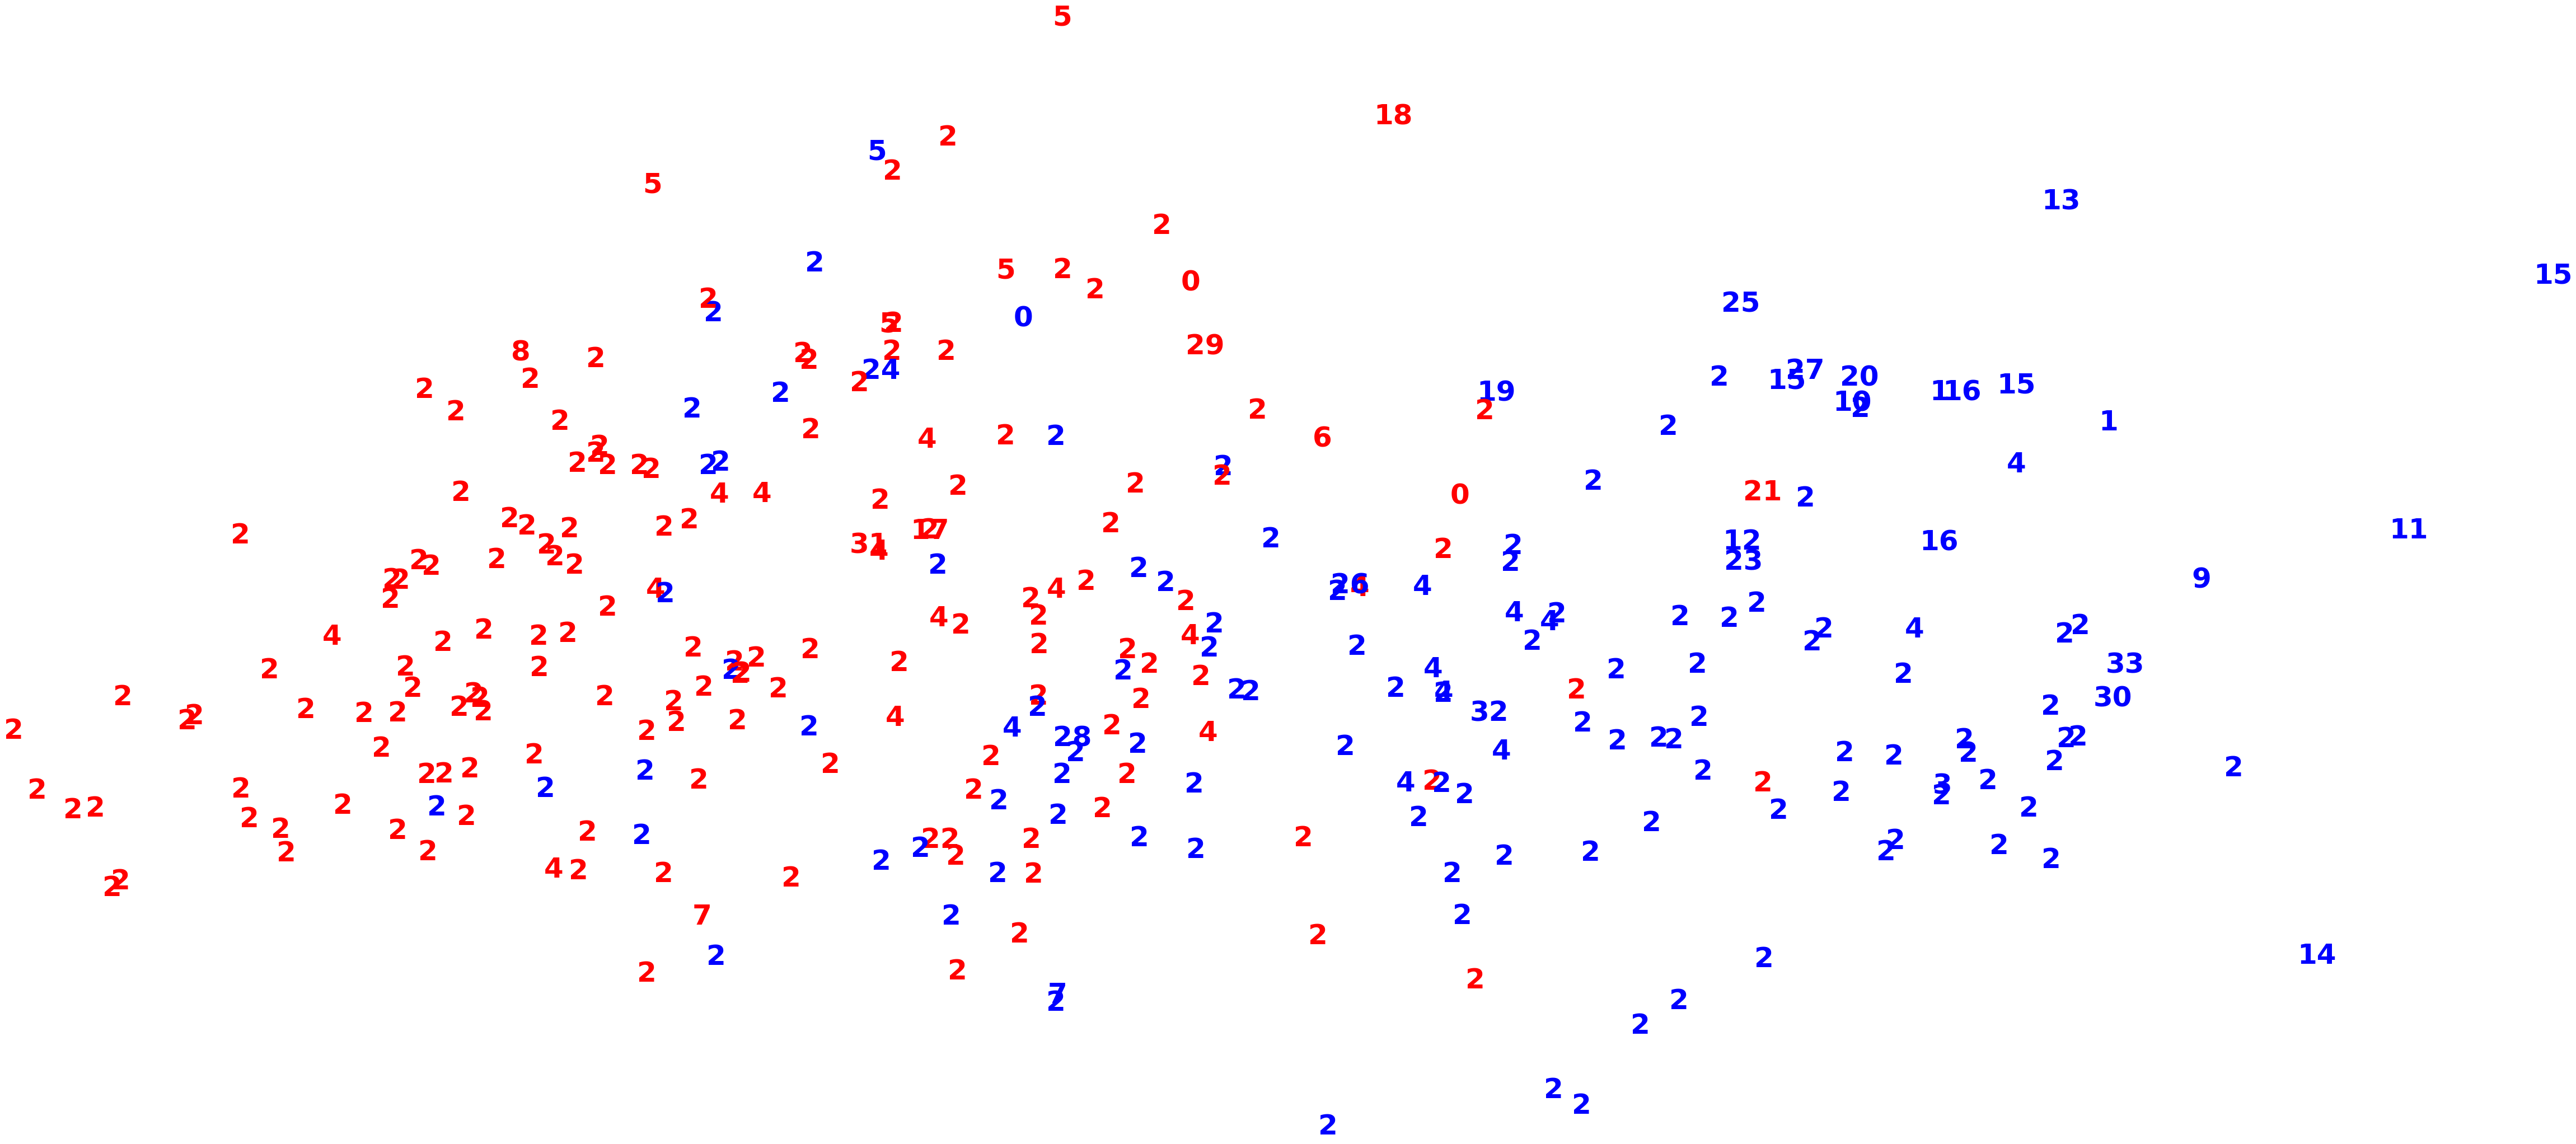

Adjusted Rand Index of the DBSCAN solution with eps=3 and minPts=1 is: 0.01717734452910878
The silhouette score of the DBSCAN solution with eps=3 and minPts=1 is: -0.08601154193041533


In [17]:
# Defining the agglomerative clustering with eps = 3 and minPts = 1:
dbscan_cluster = DBSCAN(eps=3, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=3 and minPts=1 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=3 and minPts=1 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

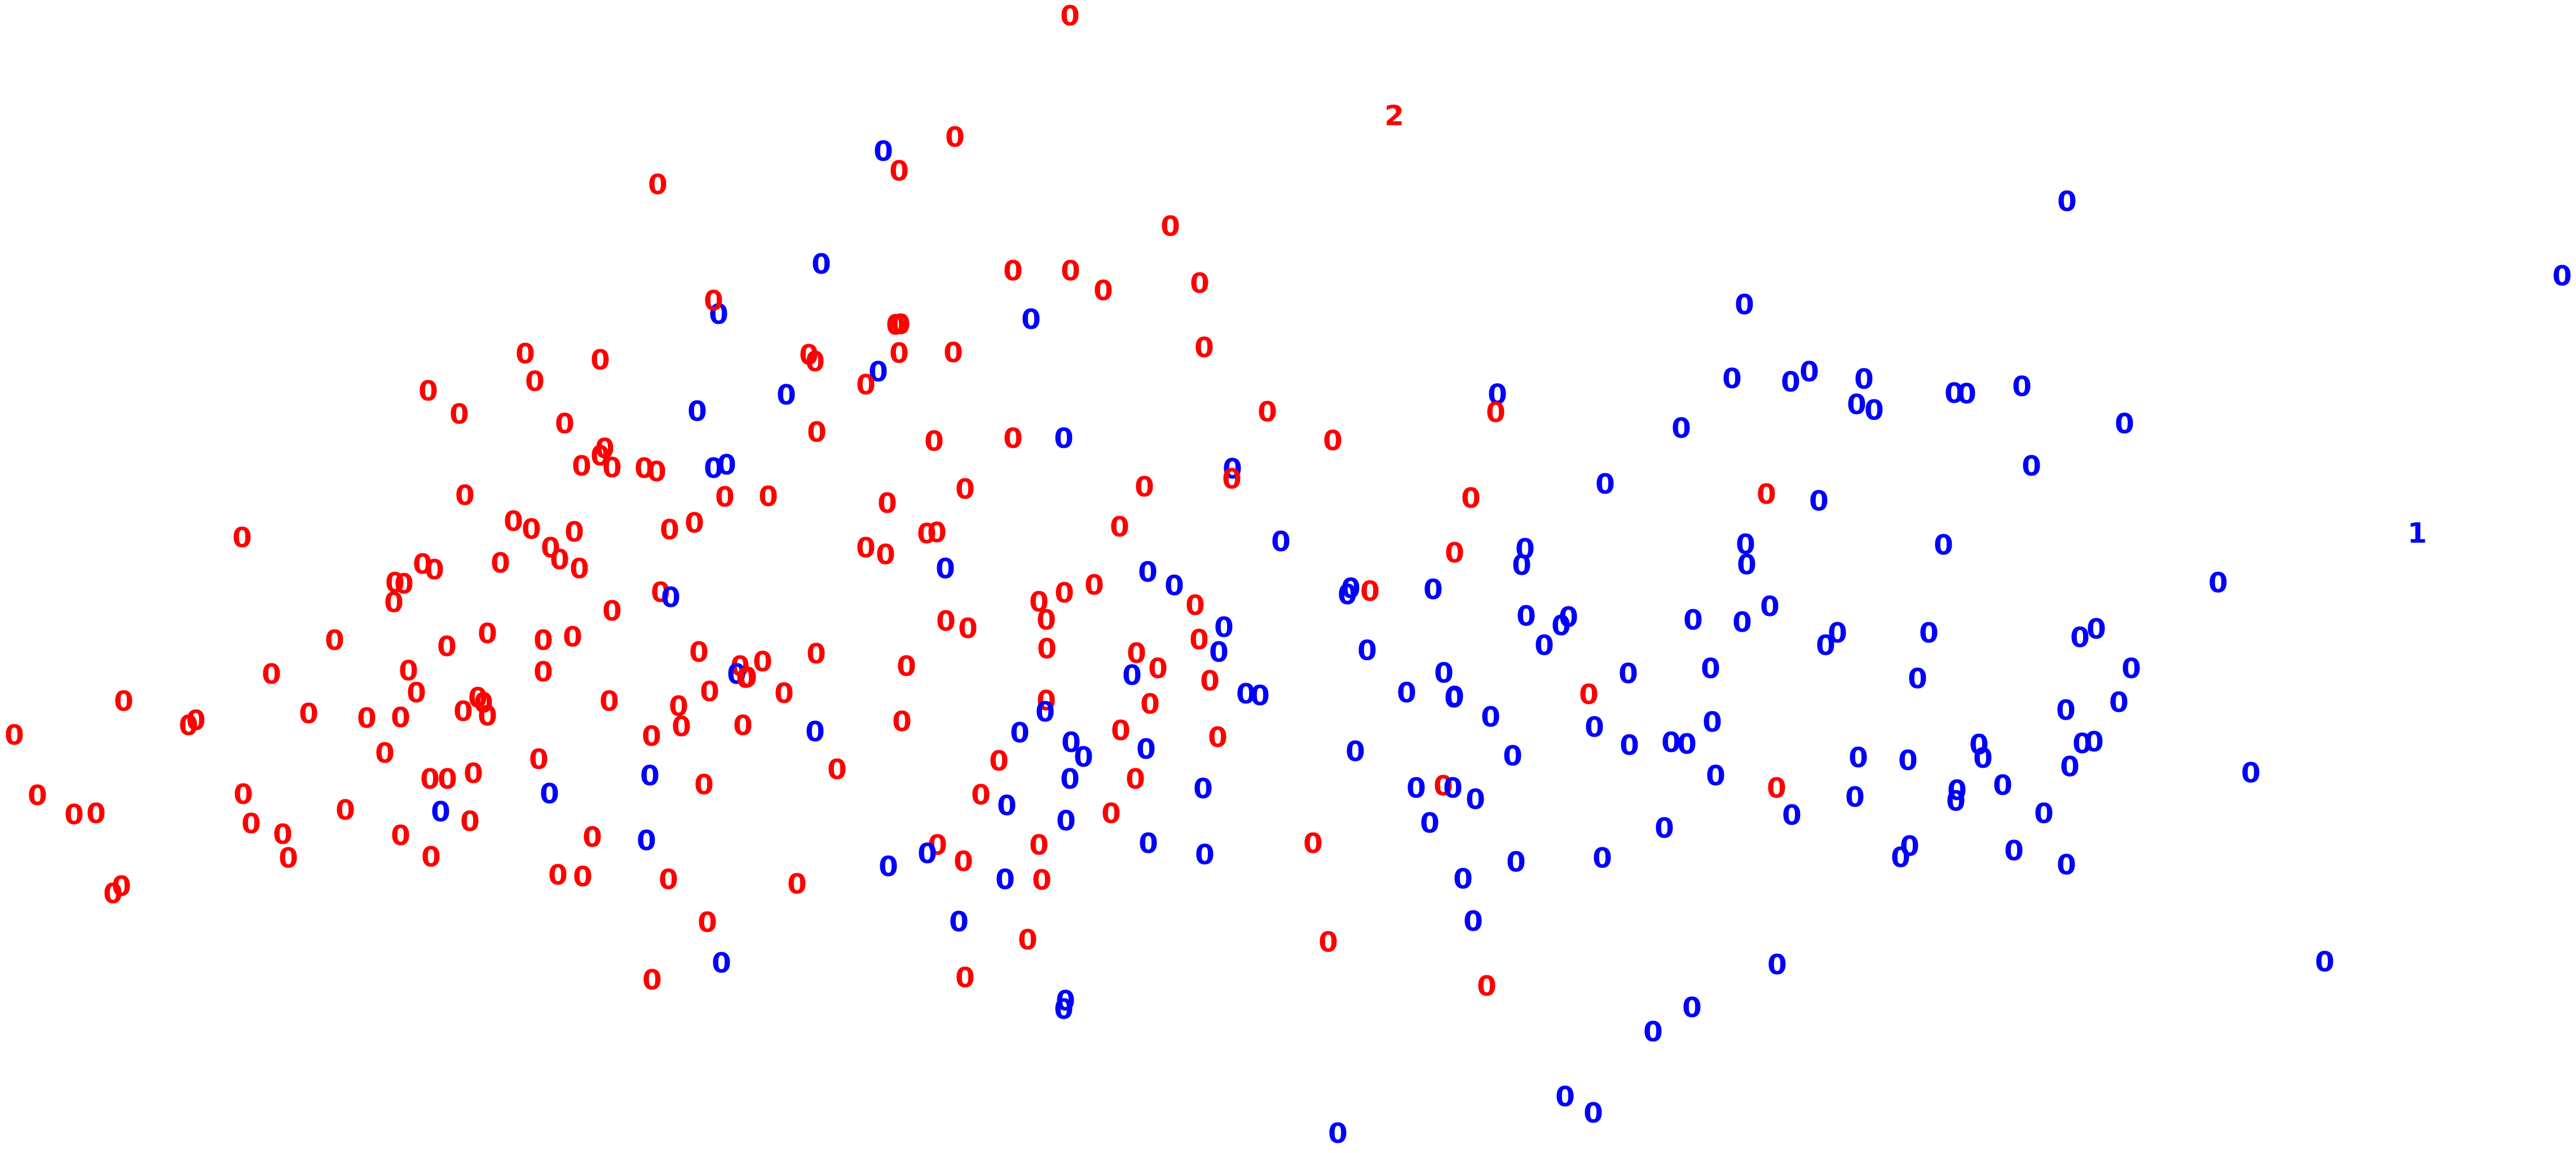

Adjusted Rand Index of the DBSCAN solution with eps=4 and minPts=1 is: 0.0001369364398033298
The silhouette score of the DBSCAN solution with eps=4 and minPts=1 is: 0.2801872428424653


In [18]:
# Defining the agglomerative clustering with eps = 4 and minPts = 1:
dbscan_cluster = DBSCAN(eps=4, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the DBSCAN solution with eps=4 and minPts=1 is: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the DBSCAN solution with eps=4 and minPts=1 is: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

When we increased the eps value from 1 to 2 to 3 to 4,
both Adjusted Rand Index and the Silhouette Score showed
a better result with eps=2 and then went down for eps=3 and eps=4. 
But in all four cases the DBSCAN always only finds two clusters.